In [1]:
%cd ..

C:\Users\nordo\Documents\GitHub\LazyDSGenerator


# LazyDSGenerator 
## Example of how to use it.

Here we are going to use the Videogames Sales Dataset whose description can be found in https://www.kaggle.com/datasets/gregorut/videogamesales

We load the CSV file from this github repo https://github.com/ValdisW/datasets/blob/master/video-game-sales.csv

In [2]:
import pandas as pd
from lazydsgen.lazydsgen import LazyDSGenerator

In [3]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/ValdisW/datasets/master/video-game-sales.csv", index_col = "Rank")
desc= """
The data is a dataframe with the following dataset:
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. Fields include:
    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release (float)
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.
"""

We need to load the credentials from OpenAI (stored in a.env file, and should be named 'OPENAI_API_KEY')

In [4]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

It is more recomended the GPT4 version as its performance is better than GPT3.5 (maybe for the most simple examples it is fine).

In [5]:
agi_vg = LazyDSGenerator(dataframe,desc, model_name="gpt-4")

D:\anaconda3\envs\genai\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


D:\anaconda3\envs\genai\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


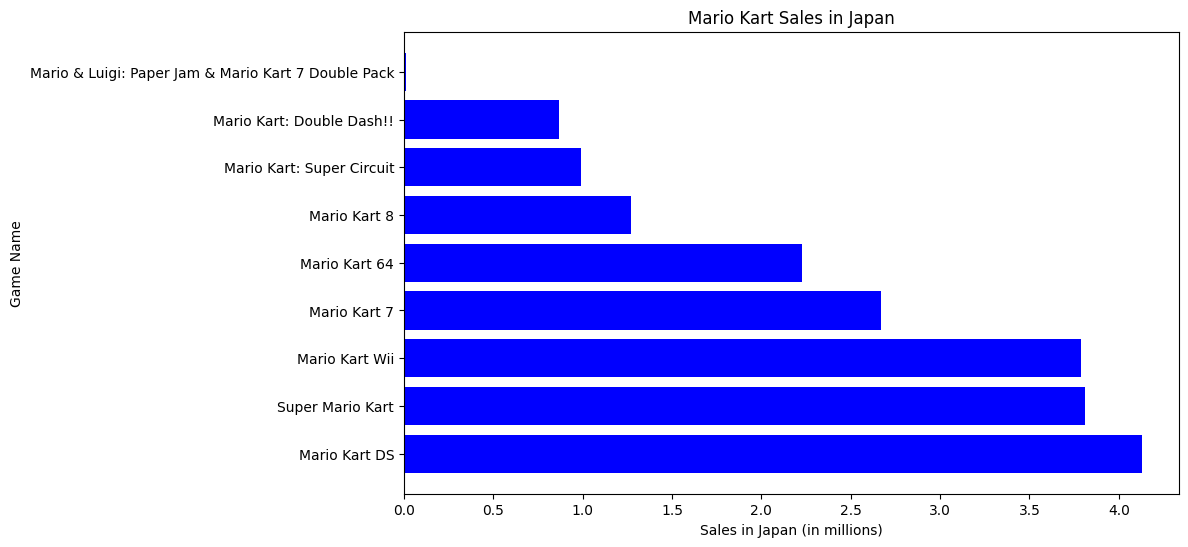

{'result': None,
 'code': "```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\ndef fun_generated(data):\n    mario_kart_data = data[data['Name'].str.contains('Mario Kart')]\n    mario_kart_data = mario_kart_data.sort_values('JP_Sales', ascending=False)\n    plt.figure(figsize=(10,6))\n    plt.barh(mario_kart_data['Name'], mario_kart_data['JP_Sales'], color='blue')\n    plt.xlabel('Sales in Japan (in millions)')\n    plt.ylabel('Game Name')\n    plt.title('Mario Kart Sales in Japan')\n    plt.show()\n```",
 'input': '\nMake a barplot with the mario kart sales in japan.\n',
 'prompt': "The user has asked the following question: \n\nMake a barplot with the mario kart sales in japan.\n\n\nDESCRIPTION OF THE DATA:\n\nThe data is a dataframe with the following dataset:\nThis dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. Fields include:\n    Rank - Ranking of overall sales\n    Name - The games name\

In [6]:
q =  """
Make a barplot with the mario kart sales in japan.
"""

agi_vg.invoke(q)

In [12]:
q2 = """Make a K-means clustering model on all the sales data using k = 10 clusters. Ignore NaN rows.
Return a dataframe with the labels and the rest of the data."""
rr = agi_vg.invoke(q2, verbose=True)

```python
import pandas as pd
from sklearn.cluster import KMeans

def fun_generated(data):
    data = data.dropna()
    kmeans = KMeans(n_clusters=10)
    data['Labels'] = kmeans.fit_predict(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
    return data
```


C:\Users\nordo\Documents\GitHub\LazyDSGenerator\generated.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels'] = kmeans.fit_predict(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])


In [21]:
rr["result"].sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Labels
Rank,,,,,,,,,,,
11381,Derby Stallion 98,SNES,1998.0,Sports,ASCII Entertainment,0.00,0.00,0.08,0.00,0.08,0
947,World of Warcraft: Mists of Pandaria,PC,2012.0,Role-Playing,Activision,0.84,0.76,0.00,0.23,1.83,5
10807,Disney Planes Fire & Rescue,3DS,2014.0,Action,Disney Interactive Studios,0.01,0.08,0.00,0.01,0.10,0
3276,Fighters MEGAMiX,SAT,1996.0,Fighting,Sega,0.00,0.00,0.62,0.00,0.62,9
645,Need for Speed: ProStreet,PS2,2007.0,Racing,Electronic Arts,0.69,0.00,0.04,1.68,2.41,5
13454,Game no Kanzume Vol 1,SCD,1994.0,Misc,Sega,0.00,0.00,0.04,0.00,0.05,0
3066,Jikkyou World Soccer 2000 Final Edition,PS2,2000.0,Sports,Konami Digital Entertainment,0.00,0.00,0.66,0.00,0.66,9
12649,Tiger Woods PGA Tour 08,DS,2007.0,Sports,Electronic Arts,0.05,0.00,0.00,0.00,0.06,0
14563,Planet of the Apes,GBA,2001.0,Action,Ubisoft,0.02,0.01,0.00,0.00,0.03,0
